<a href="https://colab.research.google.com/github/Viktorija-St/Python-projects/blob/main/Akciju_rinka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finansų rinkos analizė

### Parengiamieji darbai

In [1]:
# Paketų įrašymas 
!pip install yfinance
# Informacijos išvalymas
from IPython.display import clear_output
clear_output()

In [2]:
# Bibliotekų parsisiuntimas
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn

In [24]:
# Datos pasirinkimas
date_from = "2022-01-01" #@param {type:"date"}
date_to = "2022-12-31" #@param {type:"date"}

### Akcijų indekso analizė

In [25]:
# Parsisiunčiame S&P 500 indekso duomenis
data_index = yf.download('^GSPC', start=date_from, end=date_to).reset_index()
data_index

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
1,2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2,2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
3,2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
4,2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000
...,...,...,...,...,...,...,...
246,2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
247,2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
248,2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
249,2022-12-29,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000


In [26]:
# Indekso grafikas

fig_index = go.Figure(data=[go.Candlestick(x=data_index['Date'],
                open=data_index['Open'], high=data_index['High'],
                low=data_index['Low'], close=data_index['Close'])
                ])

fig_index.update_layout(title='S&P 500 index graph', yaxis_title='S&P 500 value', xaxis_title='Date', 
                        xaxis_rangeslider_visible=False, template='seaborn')
fig_index.show()

### Akcijų kainų analizė

In [28]:
# Parsisiunčiame akcijų duomenis ('Apple', 'Amazon', 'Boeing', 'FedEx', 'General Electric') ir sutvarkom juos

data_1 = yf.download('AAPL', start=date_from, end=date_to).reset_index()
data_1 = data_1[['Date', 'Adj Close']]
data_aapl = data_1.rename(columns={'Adj Close': 'AAPL'})
data_2 = yf.download('AMZN', start=date_from, end=date_to).reset_index()
data_2 = data_2[['Date', 'Adj Close']]
data_amzn = data_2.rename(columns={'Adj Close': 'AMZN'})
data_3 = yf.download('BA', start=date_from, end=date_to).reset_index()
data_3 = data_3[['Date', 'Adj Close']]
data_ba = data_3.rename(columns={'Adj Close': 'BA'})
data_4 = yf.download('FDX', start=date_from, end=date_to).reset_index()
data_4 = data_4[['Date', 'Adj Close']]
data_fdx = data_4.rename(columns={'Adj Close': 'FDX'})
data_5 = yf.download('GE', start=date_from, end=date_to).reset_index()
data_5 = data_5[['Date', 'Adj Close']]
data_ge = data_5.rename(columns={'Adj Close': 'GE'})


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
# Tikriname, ar duomenys turi vienodą skaičių eilučių

dfs = [data_aapl, data_amzn, data_ba, data_fdx, data_ge]

for a in dfs:
    print(a.shape[0])

251
251
251
251
251


In [30]:
# Apjungiame akcijų kainų lenteles pagal datą

result = data_aapl.merge(data_amzn, on='Date').merge(data_ba, on='Date').merge(data_fdx, on='Date').merge(data_ge, on='Date')
result

,Date,AAPL,AMZN,BA,FDX,GE
0,2022-01-03,180.959732,170.404495,207.860001,253.270615,74.806671
1,2022-01-04,178.663071,167.522003,213.630005,259.500763,77.239601
2,2022-01-05,173.910660,164.356995,213.070007,256.777557,77.239601
3,2022-01-06,171.007507,163.253998,211.339996,257.815918,77.690414
4,2022-01-07,171.176514,162.554001,215.500000,258.599548,78.817497
...,...,...,...,...,...,...
246,2022-12-23,131.860001,85.250000,189.059998,175.929993,63.848557
247,2022-12-27,130.029999,83.040001,189.399994,177.050003,64.668228
248,2022-12-28,126.040001,81.820000,188.380005,173.050003,63.989071
249,2022-12-29,129.610001,84.180000,188.910004,175.550003,65.378609


In [32]:
# 5 akcijų kainų grafikas

fig_x = px.line(result, x='Date', y=['AAPL', 'AMZN', 'BA', 'FDX', 'GE'], 
                labels={'value': 'Stock price, USD', 'variable': 'Stock'}, 
                title='Dynamics of the selected stock prices', 
                template='seaborn')
fig_x.show()

### Statistinių rodiklių analizė ir vizualizavimas

In [11]:
# Patikriname ar sutampa dviejų lentelių (akcijų ir indekso) datos
result['Date'].equals(data_index['Date'])

True

In [33]:
# Apjungiame indekso ir akcijų duomenis

index_stocks = result.merge(data_index, on='Date')
index_stocks.drop(index_stocks.columns[[6, 7, 8, 9, 11]], axis=1, inplace=True)
index_stocks = index_stocks.rename(columns={'Adj Close': 'S&P_500'})
index_stocks

,Date,AAPL,AMZN,BA,FDX,GE,S&P_500
0,2022-01-03,180.959732,170.404495,207.860001,253.270615,74.806671,4796.560059
1,2022-01-04,178.663071,167.522003,213.630005,259.500763,77.239601,4793.540039
2,2022-01-05,173.910660,164.356995,213.070007,256.777557,77.239601,4700.580078
3,2022-01-06,171.007507,163.253998,211.339996,257.815918,77.690414,4696.049805
4,2022-01-07,171.176514,162.554001,215.500000,258.599548,78.817497,4677.029785
...,...,...,...,...,...,...,...
246,2022-12-23,131.860001,85.250000,189.059998,175.929993,63.848557,3844.820068
247,2022-12-27,130.029999,83.040001,189.399994,177.050003,64.668228,3829.250000
248,2022-12-28,126.040001,81.820000,188.380005,173.050003,63.989071,3783.219971
249,2022-12-29,129.610001,84.180000,188.910004,175.550003,65.378609,3849.280029


In [34]:
# Išsaugome duomenis Excelyje
index_stocks.to_excel(f'Index_Stocks.xlsx', index = False)

In [35]:
# Apskaičiuojame akcijų ir indekso kasdienę grąžą

returns = index_stocks[['AAPL', 'AMZN', 'BA', 'FDX', 'GE', 'S&P_500']].pct_change()
returns = returns.fillna(0)
returns

,AAPL,AMZN,BA,FDX,GE,S&P_500
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.012692,-0.016916,0.027759,0.024599,0.032523,-0.000630
2,-0.026600,-0.018893,-0.002621,-0.010494,0.000000,-0.019393
3,-0.016693,-0.006711,-0.008119,0.004044,0.005837,-0.000964
4,0.000988,-0.004288,0.019684,0.003039,0.014507,-0.004050
...,...,...,...,...,...,...
246,-0.002798,0.017425,0.004303,0.001366,0.000245,0.005868
247,-0.013878,-0.025924,0.001798,0.006366,0.012838,-0.004050
248,-0.030685,-0.014692,-0.005385,-0.022592,-0.010502,-0.012021
249,0.028324,0.028844,0.002813,0.014447,0.021715,0.017461


In [36]:
# Sugeneruojame aprašomosios statistikos lentelę

stat = returns.describe()
stat

,AAPL,AMZN,BA,FDX,GE,S&P_500
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.001069,-0.002320,0.000085,-0.001140,-0.000292,-0.000771
std,0.022426,0.031508,0.029396,0.026919,0.021968,0.015221
min,-0.058680,-0.140494,-0.104701,-0.214038,-0.103360,-0.043237
25%,-0.015723,-0.019864,-0.015063,-0.013742,-0.012417,-0.009930
50%,-0.001331,-0.002578,0.000521,-0.001008,0.000628,-0.001592
75%,0.013267,0.016223,0.016218,0.011796,0.011579,0.009487
max,0.088975,0.135359,0.094630,0.144144,0.061950,0.055434


In [37]:
# Apskaičiuojame trūkstamus statistinius rodiklius

median = returns.median()
var = returns.var()
kurt = returns.kurtosis()
skew = returns.skew()


In [38]:
# Apskaičiuojame metinę grąžą

annual_return = []

def annual_ret():
    """
    Funkcija apskaičiuoja kiekvienos akcijos ir indekso metinę grąžą. 
    Iš metų pabaigos kainos atimame metų pradžios kainą 
    ir padaliname iš metų pradžios kainos. Tokią grąžą gautų investuotojas, 
    jeigu laikytų akciją visus metus. 
    """
    for x in range(1,7):
        annual_return.append(((index_stocks.iloc[-1, int(x)])-(index_stocks.iloc[0, int(x)]))/(index_stocks.iloc[0, int(x)]))
    return annual_return

annual_ret()

[-0.2819949985568382,
 -0.5070552576558551,
 -0.08356583790139016,
 -0.3161464972738544,
 -0.12561493759344666,
 -0.19953050663444413]

In [39]:
# Pridedame papildomus rodiklius prie aprašomosios statistikos lentelės

stat.loc['median'] = list(median)
stat.loc['variance'] = list(var)
stat.loc['kurtosis'] = list(kurt)
stat.loc['skewness'] = list(skew)
stat.loc['annual return'] = list(annual_return)

stat

,AAPL,AMZN,BA,FDX,GE,S&P_500
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.001069,-0.002320,0.000085,-0.001140,-0.000292,-0.000771
std,0.022426,0.031508,0.029396,0.026919,0.021968,0.015221
min,-0.058680,-0.140494,-0.104701,-0.214038,-0.103360,-0.043237
25%,-0.015723,-0.019864,-0.015063,-0.013742,-0.012417,-0.009930
50%,-0.001331,-0.002578,0.000521,-0.001008,0.000628,-0.001592
75%,0.013267,0.016223,0.016218,0.011796,0.011579,0.009487
max,0.088975,0.135359,0.094630,0.144144,0.061950,0.055434
median,-0.001331,-0.002578,0.000521,-0.001008,0.000628,-0.001592
variance,0.000503,0.000993,0.000864,0.000725,0.000483,0.000232


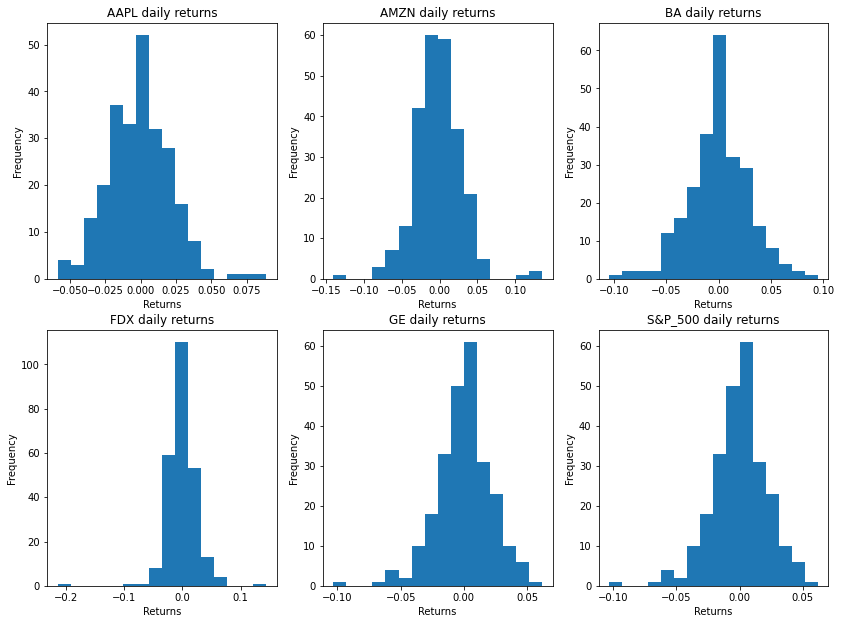

In [40]:
# Akcijų kainų ir indekso dieninių grąžų histogramos

plt.figure(figsize=(14, 16))

plt.subplot(331)
plt.hist(returns['AAPL'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('AAPL daily returns')

plt.subplot(332)
plt.hist(returns['AMZN'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('AMZN daily returns')

plt.subplot(333)
plt.hist(returns['BA'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('BA daily returns')

plt.subplot(334)
plt.hist(returns['FDX'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('FDX daily returns')

plt.subplot(335)
plt.hist(returns['GE'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('GE daily returns')

plt.subplot(336)
plt.hist(returns['GE'],bins=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('S&P_500 daily returns')

plt.show()

In [41]:
# Koreliacijos lentelė

correlation = returns.corr()
correlation

,AAPL,AMZN,BA,FDX,GE,S&P_500
AAPL,1.000000,0.695907,0.534265,0.478670,0.553062,0.886274
AMZN,0.695907,1.000000,0.496894,0.443057,0.474946,0.791682
BA,0.534265,0.496894,1.000000,0.501107,0.646467,0.629579
FDX,0.478670,0.443057,0.501107,1.000000,0.517685,0.568300
GE,0.553062,0.474946,0.646467,0.517685,1.000000,0.688483
S&P_500,0.886274,0.791682,0.629579,0.568300,0.688483,1.000000


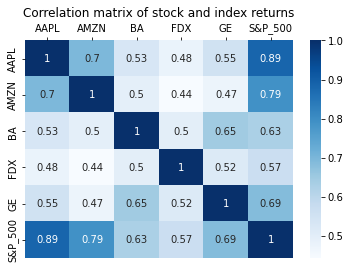

In [42]:
# Koreliacijos matrica

correl_map = sn.heatmap(correlation, annot=True, cmap='Blues')
correl_map.xaxis.tick_top()
plt.title('Correlation matrix of stock and index returns', fontsize=12, x=0.5, y=1.15)
plt.show()

## Tyrimo klausimas: 

Ar verta investuoti į pasirinktas 5 akcijas? 

## Išvados: 

Ir indekso, ir visų 5 akcijų vertė per metus sumažėjo. Labiausiai nukrito AMZN, mažiausiai - BA. Visų akcijų standartinis nuokrypis buvo panašus, tačiau visos nagrinėjamos akcijos svyravo vidutiniškai daugiau nei indeksas. FDX dieninės akcijų grąžos buvo labiausiai susikoncentravusios apie 0. Teigiama asimetrija pasižymi AAPL, didžiausia neigiama - FDX. Visos akcijos teigiamai koreliuoja tarpusavyje, nors ryšys nėra stiprus. Atsižvelgiant į gautus rezultatus, 2022 metais į visas pasirinktas 5 akcijas nebuvo tikslinga investuoti. Verta pasirinkti akcijas su neigiama tarpusavio koreliacija ir atlikti tikėtinos akcijų grąžos prognozavimą.